# Digit Recognition

Using the digits dataset from sklearn, different classifier models are tested.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree, svm, linear_model, metrics, preprocessing, pipeline, ensemble
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

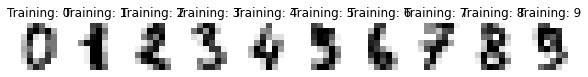

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.4, random_state=0)

# cross validation folds
cv = 10


# test, show pictures
def test_classifier(predicted, clf):
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8,8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Prediction: {prediction}')

    print(f"Classifier score: {clf.score(X_test, y_test)}")

    print(f"Classification report for classifier {clf}:\n"
          f"{metrics.classification_report(y_test, predicted)}\n")
    
# cross validation
def cross_validate(X, y, clf, cv):
    scores = cross_val_score(clf, X, y, cv=cv)
    print(f"Cross validation score, using {cv} folds")
    for i, score in enumerate(scores):
        print(f"Test {i}: {score}")
    print(f"Mean score: {np.mean(scores)}, std: {np.std(scores)}")
    

# use grid search to find optimal parameters
def fit_grid_search_params(parameters, clf, cv=cv):
    clf = GridSearchCV(clf, parameters, cv=cv)
    clf.fit(X_train,y_train)
    print(f"Optimal setting: {clf.best_params_}")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print("Results on test set")
    print(classification_report(y_true, y_pred))
    return clf

## K Nearest Neighbours

In [117]:
from sklearn.neighbors import KNeighborsClassifier

# find optimal K
k_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

knn = fit_grid_search_params(k_values, KNeighborsClassifier())

cross_validate(X, y, knn, 10)

Optimal setting: {'n_neighbors': 1}

Results on test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.99        73
           2       1.00      1.00      1.00        71
           3       0.96      1.00      0.98        70
           4       1.00      1.00      1.00        63
           5       0.99      0.98      0.98        89
           6       0.99      1.00      0.99        76
           7       1.00      1.00      1.00        65
           8       1.00      0.95      0.97        78
           9       0.97      0.96      0.97        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

Cross validation score, using 10 folds
Test 0: 0.9444802201582387
Test 1: 1.0
Test 2: 0.99
Test 3: 0.9751587301587301
Test 4: 0.968328173374613
Test 5: 0.9839181286549709
Test 6: 0.994

## Decision Tree

In [105]:
# create decision tree classifier
params = {'max_depth': [1,3,5,10,12,15,17,20]}
dec_tree = fit_grid_search_params(params, tree.DecisionTreeClassifier())

cross_validate(X, y, dec_tree, cv)

Optimal setting: {'max_depth': 10}

Results on test set
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.73      0.84      0.78        73
           2       0.93      0.73      0.82        71
           3       0.75      0.86      0.80        70
           4       0.90      0.84      0.87        63
           5       0.85      0.83      0.84        89
           6       0.96      0.96      0.96        76
           7       0.80      0.92      0.86        65
           8       0.73      0.58      0.64        78
           9       0.84      0.84      0.84        74

    accuracy                           0.83       719
   macro avg       0.84      0.84      0.83       719
weighted avg       0.84      0.83      0.83       719

Cross validation score, using 10 folds
Test 0: 0.7722222222222223
Test 1: 0.8666666666666667
Test 2: 0.8555555555555555
Test 3: 0.7944444444444444
Test 4: 0.7833333333333333
Test 5: 0.8

## Support Vector Machine

In [121]:
# create support vector machine classifier

clf = pipeline.make_pipeline(preprocessing.StandardScaler(), svm.SVC())
clf.fit(X_train, y_train)
print(f"Score: {clf.score(X_test, y_test)}")
cross_validate(X, y, clf, cv)

print()

param_grid = [
    {'svc__C': np.linspace(1, 3, 5), 'svc__gamma': np.linspace(0, 1, 4), 'svc__kernel': ['rbf']},
    {'svc__C': np.linspace(1, 3, 5), 'svc__degree': [2, 3, 4, 5], 'svc__kernel': ['poly']},
]

print("Using grid search")
svc = fit_grid_search_params(param_grid, clf)

Score: 0.9819193324061196
Cross validation score, using 10 folds
Test 0: 0.9444444444444444
Test 1: 0.9944444444444445
Test 2: 0.9777777777777777
Test 3: 0.9111111111111111
Test 4: 0.9777777777777777
Test 5: 0.9888888888888889
Test 6: 0.9777777777777777
Test 7: 0.9441340782122905
Test 8: 0.9608938547486033
Test 9: 0.9553072625698324
Mean score: 0.9632557417752947, std: 0.02402037522167597

Using grid search
Optimal setting: {'svc__C': 2.5, 'svc__degree': 2, 'svc__kernel': 'poly'}

Results on test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99        73
           2       0.99      0.99      0.99        71
           3       0.96      0.97      0.96        70
           4       1.00      0.98      0.99        63
           5       0.98      0.96      0.97        89
           6       0.99      0.99      0.99        76
           7       0.98      0.98      0.98        65
       

## Ridge Classifier

In [110]:
# create ridge classifier
rc = linear_model.RidgeClassifier()
rc = rc.fit(X_train, y_train)

print(f"Classification report:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")

print("Using cross validation")
cross_validate(X, y, rc, cv)

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.93      0.88      0.90        73
           2       0.85      0.97      0.91        71
           3       0.94      0.91      0.93        70
           4       0.95      0.95      0.95        63
           5       0.98      0.96      0.97        89
           6       0.93      0.97      0.95        76
           7       0.94      0.97      0.95        65
           8       0.98      0.77      0.86        78
           9       0.83      0.91      0.86        74

    accuracy                           0.93       719
   macro avg       0.93      0.93      0.93       719
weighted avg       0.93      0.93      0.93       719


Using cross validation
Cross validation score, using 10 folds
Test 0: 0.9222222222222223
Test 1: 0.9388888888888889
Test 2: 0.9111111111111111
Test 3: 0.8388888888888889
Test 4: 0.9111111111111111
Test 5: 0.8944444444

In [97]:
# use grid search to tune alpha
params = {'alpha': np.linspace(1, 4, 20)}
rc = fit_grid_search_params(params, linear_model.RidgeClassifier())

cross_validate(X, y, rc, cv)

Optimal setting: {'alpha': 2.894736842105263}

Results on test set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.92      0.89      0.90        73
           2       0.87      0.96      0.91        71
           3       0.94      0.91      0.93        70
           4       0.97      0.95      0.96        63
           5       0.96      0.96      0.96        89
           6       0.95      0.95      0.95        76
           7       0.94      0.97      0.95        65
           8       0.97      0.78      0.87        78
           9       0.82      0.91      0.86        74

    accuracy                           0.92       719
   macro avg       0.93      0.93      0.93       719
weighted avg       0.93      0.92      0.92       719

Cross validation score, using 10 folds
Test 0: 0.9222222222222223
Test 1: 0.9388888888888889
Test 2: 0.9111111111111111
Test 3: 0.8388888888888889
Test 4: 0.9111111111111111


In [111]:
# use ridge classifier with built in cross validation
rc = linear_model.RidgeClassifierCV(alphas=np.logspace(0.01, 3, 20))
rc.fit(X_train, y_train)
print(f"Classification report:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")

cross_validate(X, y, rc, cv)

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.93      0.88      0.90        73
           2       0.85      0.97      0.91        71
           3       0.94      0.91      0.93        70
           4       0.95      0.95      0.95        63
           5       0.98      0.96      0.97        89
           6       0.93      0.97      0.95        76
           7       0.94      0.97      0.95        65
           8       0.98      0.77      0.86        78
           9       0.83      0.91      0.86        74

    accuracy                           0.93       719
   macro avg       0.93      0.93      0.93       719
weighted avg       0.93      0.93      0.93       719


Cross validation score, using 10 folds
Test 0: 0.9333333333333333
Test 1: 0.95
Test 2: 0.9222222222222223
Test 3: 0.85
Test 4: 0.9111111111111111
Test 5: 0.8944444444444445
Test 6: 0.9611111111111111
Test 7: 0.9441340

## Logistic Regression

In [122]:
# create logistic regression classifier
params = {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'tol': np.logspace(0.01, 3, 5), 'C': np.logspace(0.001, 2, 5)},
lr_clf = fit_grid_search_params(params, linear_model.LogisticRegression())

cross_validate(X, y, lr_clf, cv)

Optimal setting: {'C': 10.011519555381687, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 5.721369546523265}

Results on test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.90      0.95      0.92        73
           2       0.99      0.99      0.99        71
           3       0.99      0.96      0.97        70
           4       0.97      0.98      0.98        63
           5       0.97      0.97      0.97        89
           6       0.97      0.97      0.97        76
           7       1.00      0.98      0.99        65
           8       0.96      0.88      0.92        78
           9       0.91      0.96      0.93        74

    accuracy                           0.96       719
   macro avg       0.96      0.96      0.96       719
weighted avg       0.96      0.96      0.96       719

Cross validation score, using 10 folds
Test 0: 0.9055555555555556
Test 1: 0.95
Test 2: 0.8833333333333333
Test 

## AdaBoost

In [13]:
# create adaboost classifier using decision tree
params = {'n_estimators': [75,100,125,150], 'base_estimator': [tree.DecisionTreeClassifier(max_depth=2), tree.DecisionTreeClassifier(max_depth=3), tree.DecisionTreeClassifier(max_depth=4)]}
ad = fit_grid_search_params(params, ensemble.AdaBoostClassifier())

cross_validate(X, y, ad, 5)

Optimal setting: {'base_estimator': DecisionTreeClassifier(max_depth=4), 'n_estimators': 150}

Results on test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.92      0.93      0.93        73
           2       0.97      0.90      0.93        71
           3       1.00      0.89      0.94        70
           4       0.98      0.95      0.97        63
           5       0.99      0.92      0.95        89
           6       1.00      0.91      0.95        76
           7       0.98      0.97      0.98        65
           8       0.75      0.97      0.84        78
           9       0.90      0.95      0.92        74

    accuracy                           0.94       719
   macro avg       0.95      0.94      0.94       719
weighted avg       0.95      0.94      0.94       719

Cross validation score, using 5 folds
Test 0: 0.8777777777777778
Test 1: 0.8138888888888889
Test 2: 0.8997214484679665
Test 3:

## Bagging

In [18]:
# bagging using decision tree
params = {'n_estimators': [5, 10, 15, 20], 
          'base_estimator': [tree.DecisionTreeClassifier(max_depth=2), tree.DecisionTreeClassifier(max_depth=3), tree.DecisionTreeClassifier(max_depth=4)],
          'n_jobs': [-1]}

bag = fit_grid_search_params(params, ensemble.BaggingClassifier())

cross_validate(X, y, bag, 5)

Optimal setting: {'base_estimator': DecisionTreeClassifier(max_depth=4), 'n_estimators': 15, 'n_jobs': -1}

Results on test set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.38      0.38      0.38        73
           2       0.53      0.90      0.67        71
           3       0.77      0.80      0.78        70
           4       0.62      0.92      0.74        63
           5       0.89      0.65      0.75        89
           6       0.83      0.89      0.86        76
           7       0.76      0.82      0.79        65
           8       0.33      0.03      0.05        78
           9       0.83      0.81      0.82        74

    accuracy                           0.70       719
   macro avg       0.69      0.72      0.68       719
weighted avg       0.69      0.70      0.67       719

Cross validation score, using 5 folds
Test 0: 0.7611111111111111
Test 1: 0.6722222222222223
Test 2: 0.86908077994

## Random Forest

In [20]:
# create random forest classfier

params = {'n_estimators': [50,100,150,200], 
          'criterion': ['gini', 'entropy'], 
          'max_depth': [3,4,5], 
          'n_jobs': [-1]}

rf = fit_grid_search_params(params, ensemble.RandomForestClassifier())

cross_validate(X, y, rf, 5)

Optimal setting: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150, 'n_jobs': -1}

Results on test set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.87      0.92      0.89        73
           2       0.98      0.90      0.94        71
           3       0.93      0.93      0.93        70
           4       0.97      0.95      0.96        63
           5       0.95      0.94      0.95        89
           6       0.97      0.97      0.97        76
           7       0.90      0.98      0.94        65
           8       0.96      0.86      0.91        78
           9       0.89      0.92      0.91        74

    accuracy                           0.94       719
   macro avg       0.94      0.94      0.94       719
weighted avg       0.94      0.94      0.94       719

Cross validation score, using 5 folds
Test 0: 0.9027777777777778
Test 1: 0.8777777777777778
Test 2: 0.9164345403899722
Test 3: 